# Adaline y Perceptron para procesamiento del conjunto de datos DIGITS

## Hernández Montellano Carlos
## Redes Neuronales
## 1002-A

In [2]:
#Biblioteca de funciones matemáticas (álgebra lineal, números aleatorios, etc).
import numpy as np

#Se cargan los clasificadores
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Adaline
from mlxtend.classifier import Perceptron

#MinMaxScaler
import sklearn.preprocessing as prep

#Biblioteca para graficar
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap # Content list of color for plotting

 **Cargar en X,Y, los datos del conjunto MNIST**

In [49]:

from mlxtend.data import mnist_data #Subconjunto del conjunto original
[X, Y] = mnist_data()
#Se obtiene la cantidad de renglones y de columnas de la matriz de datos
[renX, colX] = X.shape
[renX, colX]

[5000, 784]

Cada vector de la matriz Xi tiene la información que representa un dígito numérico. Cuando se realiza un reshape a un vector para que este se transforme a una matriz de 28x28, entonces se puede describir una imagen que contiene uno de los 10 dígitos. Las clases están divididas cada 500 renglones de X, es decir, en los primeros 500 renglones se tienen representaciones de 0's, en los siguientes 500 se tienen representaciones de 1's, y así sucesivamente hasta el dígito 9.
El vector Y contiene las clases a las que pertenece cada renglon de la matriz X.

**Mostrar gráficamente 2 elementos de cada dígito** 

usar plt.**subplot()** para poder hacer varias gráficas.

In [84]:
pltData = np.zeros((20, 28, 28)) #Datos de los primeros 2 digitos cada 500 renglones
etqData = np.zeros(20, dtype=int) #Datos del target de los primeros 2 digitos cada 500 renglones
#Se obtienen los primeros 2 digitos cada 500 renglones del dataset
for i in range(10):
    index1 = i*500
    index2 = i*500 + 1
    pltData[i*2]     = X[index1].reshape(28, 28)
    pltData[i*2 + 1] = X[index2].reshape(28, 28)
    etqData[i*2]     = Y[index1] 
    etqData[i*2 + 1] = Y[index2]
    

In [389]:
#Función para realizar el plot de los dígitos
def plotDigits (plotData, labelData, ren, col, otherLabel=[]):
    #Se crea la instancia del plot
    fig, axs = plt.subplots(ren, col)
    fig.suptitle('Digitos')
    img = []
    print(axs.shape)
    #Se agregan los subplots a la figura final
    for i in range(ren):
        for j in range(col):
            img.append(axs[i, j].imshow(plotData[i * col + j],))
            if (otherLabel==[]):
                axs[i, j].set_title('Etq=' + str(labelData[i * col + j]))
            else:
                axs[i, j].set_title('Etq=' + str(labelData[i * col + j]) + ' Resp=' + str(otherLabel[i * col + j]))
    #tamaño
    plt.rcParams["figure.figsize"] = (10,6)
    #espacio entre gráficas
    plt.subplots_adjust(wspace = 1.5)

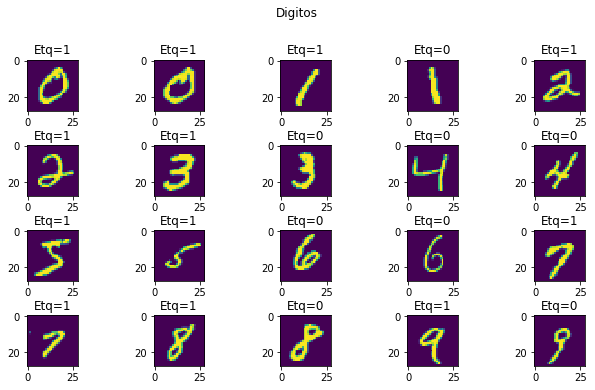

In [173]:
#Se muestran 2 elementos de cada dígito
plotDigits(pltData, etqData, 4, 5)

### Mostrar los valores máx y mín de alguna imagen

In [37]:
np.min(X[0])

0.0

In [38]:
np.max(X[0])

255.0

### Normalizar los valores en X

In [41]:
#Se crea un objeto del preprocessing de la biblioteca sklearn
#En este caso se utilizará un MinMaxScaler
minMax = prep.MinMaxScaler(feature_range=(0, 1), copy=True)

**Guardar los valores transformados en Xs** (Xs =X scaled)

In [45]:
Xs = minMax.fit_transform(X)
Xs[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Verificar que los valores escalados estén en el rango de 0 a 1 

In [43]:
np.min(Xs)

0.0

In [44]:
np.max(Xs)

1.0

## Usar el perceptron para clasificar los datos 

En este caso, tomar datos de dos clases para hacer la clasificación, por ejemplo de 0 vs 1,
6 vs 9, etc

In [50]:
#forma de Xs
renX, colX

(5000, 784)

In [ ]:
#indicesX puede ser por ejemplo  concatenate( indices de 0:500, 4500:500) para dígitos 0 y 9

In [273]:
indices = np.arange(0,1000)
#En este caso se toman los 6 y los 9 para el entrenamiento
indicesX = np.concatenate( [np.arange(3000,3500), np.arange(4500,5000)])

**Guardar en Xt, Yt** los valores para entrenar el perceptron.

Recordar que Yt sólo puede tener valores entre 0 y 1

In [274]:
Xt = np.zeros((1000, 784))
Yt = np.zeros(1000, dtype=int)
Yt[500:1000] = 1
Xt[:,] = Xs[indicesX]
#plt.imshow(Xt[4].reshape(28,28))

Xt, Yt, deben tener ambos 1000 elementos

In [143]:
Xt.shape

(1000, 784)

In [147]:
Yt.shape

(1000,)

#### tomar algunos valores aleatoriamente y mostrarlos junto a su etiqueta

In [232]:
#indices seleccionados aleatoriamente (no tienen que ser los mismos)
randomIndex = np.arange(1000)
np.random.shuffle(randomIndex)
randomIndex = randomIndex[0:20]
randomIndex

array([ 38, 534, 106, 414, 716, 274, 456, 611, 944, 325, 243, 268, 505,
       625, 590, 652, 662, 783, 976, 574])

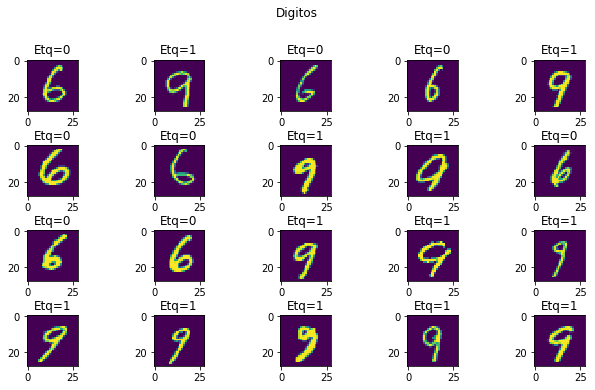

In [275]:
plotData = np.zeros((20, 28, 28))
etqData = np.zeros(20, dtype=int)
for i in range(20):
    plotData[i] = Xt[randomIndex[i]].reshape(28, 28)
    etqData[i] = Yt[randomIndex[i]]
plotDigits(plotData, etqData, 4, 5)

### entrenar el perceptron

In [149]:
per = Perceptron(eta=0.01, epochs=50, random_seed=1, print_progress=3)
per.fit(Xt,Yt)

Iteration: 30/30 | Elapsed: 0:00:00 | ETA: 0:00:000TA: 00:00:000

In [271]:
#calcular la respuesta usando predict
resp = per.predict(Xt)
resp.shape

(1000,)

In [155]:
acc = (resp==Yt)*1.0

In [163]:
# calcular cuántos de las etiquetas calculadas coinciden con las etiquetas originales.
np.count_nonzero(acc==1)

1000

**Mostrar gráficamente la respuesta del perceptron**

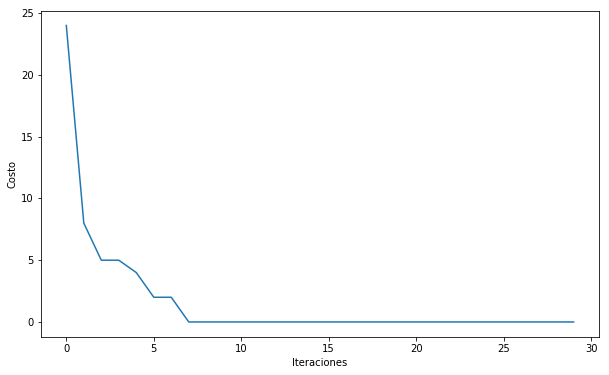

In [164]:
plt.plot(range(len(per.cost_)),per.cost_)
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.show()

**Calcular la respuesta accuracy** del perceptron

In [180]:
per.score(Xt, Yt)

1.0

**Mostrar los valores originales y calculados en cada imagen**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


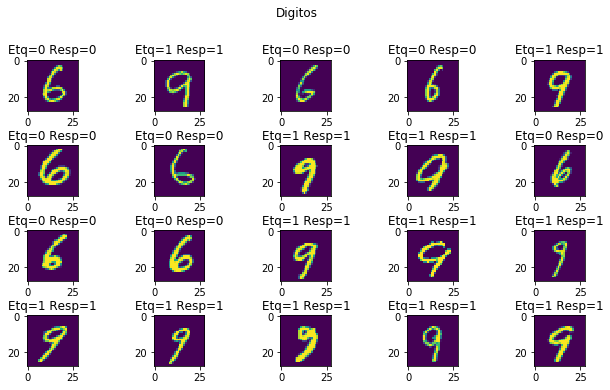

In [276]:
respRIndex = np.zeros(20, dtype=int)
for i in range(20):
    respRIndex[i] = Yt[randomIndex[i]]
plotDigits(plotData, etqData, 4, 5, otherLabel=respRIndex)

## Repetir el experimento con la RNA Adaline

In [402]:
#En este caso se toman los digitos 1 y los 7 para el entrenamiento
indicesX = np.concatenate( [np.arange(500,1000), np.arange(3500,4000)])

Xt = np.zeros((1000, 784))
Yt = np.zeros(1000, dtype=int)
Yt[500:1000] = 1
Xt[:,] = Xs[indicesX]

#### tomar algunos valores aleatoriamente y mostrarlos junto a su etiqueta

(4, 5)


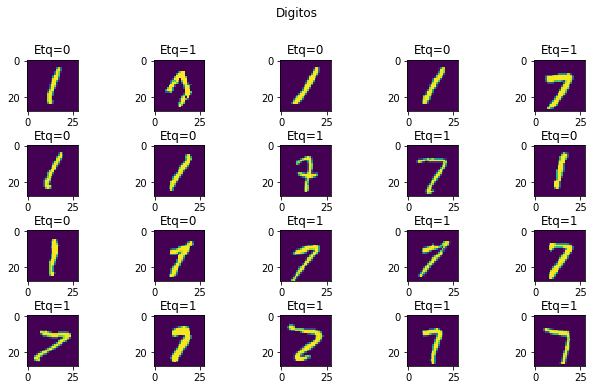

In [392]:
plotData = np.zeros((20, 28, 28))
etqData = np.zeros(20, dtype=int)
for i in range(20):
    plotData[i] = Xt[randomIndex[i]].reshape(28, 28)
    etqData[i] = Yt[randomIndex[i]]
plotDigits(plotData, etqData, 4, 5)

### Entrenar el ADALINE

In [252]:
ada = Adaline(eta=0.000015, epochs=5000, minibatches=10, random_seed=1, print_progress=3)
ada.fit(Xt, Yt)

Iteration: 5000/5000 | Cost 23.92 | Elapsed: 0:00:25 | ETA: 0:00:00

In [399]:
#calcular la respuesta usando predict
resp = ada.predict(Xt)
resp.shape

(1000,)

**Calcular la respuesta accuracy** del Adaline

In [262]:
#obtener el accuracy
acc = (resp==Yt)*1.0

# calcular cuántos de las etiquetas calculadas coinciden con las etiquetas originales.
np.count_nonzero(acc==1)

996

In [265]:
#Prediction accuracy utilizando la función score
ada.score(Xt, Yt)

0.996

**Mostrar gráficamente la respuesta del Adaline**

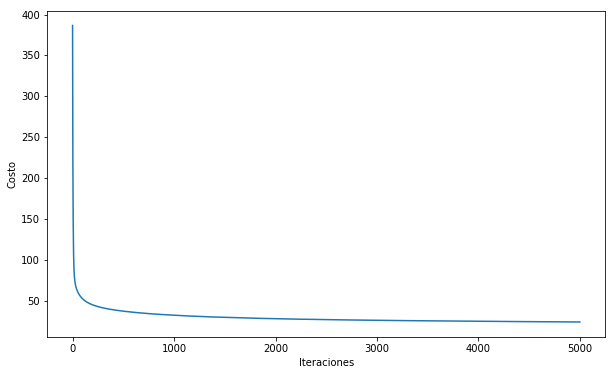

In [264]:
plt.plot(range(len(ada.cost_)),ada.cost_)
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.show()

**Mostrar los valores originales y calculados en cada imagen**

(4, 5)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


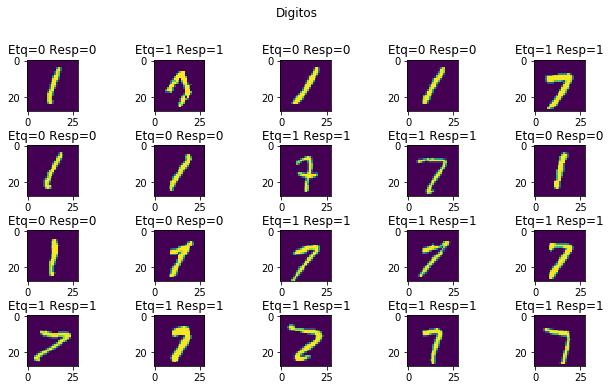

In [393]:
respRIndex = np.zeros(20, dtype=int)
for i in range(20):
    respRIndex[i] = Yt[randomIndex[i]]
plotDigits(plotData, etqData, 4, 5, otherLabel=respRIndex)

**Mostrar las imagenes donde la respuesta del clasificador no corresponde a la etiqueta**

In [280]:
acc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [403]:
numError = 1000 - np.count_nonzero(acc==1)
#errorData = np.zeros((numError, 28, 28))
errorData = np.empty((0, 784), dtype=float)
errorData3D = np.zeros((numError, 28, 28))
etqOriData = np.empty(1, dtype=int)
etqErrorData = np.empty(1, dtype=int)
#indexError = np.zeros(numError)
for i in range(1000):
    if (acc[i] == 0):
        print(i)
        errorData = np.append(errorData, [Xt[i]], axis=0)
        etqOriData = np.append(etqOriData, [Yt[i]], axis=0)
        etqErrorData = np.append(etqErrorData, [resp[i]], axis=0)
for i in range(numError):
    errorData3D[i] = errorData[i].reshape(28,28)
#plotDigits(Xt, etqOriData, 1, numError, etqErrorData)
#if (resp != Yt)

61
570
830
895


In [404]:
etqOriData

array([1, 0, 1, 1, 1])

In [405]:
etqErrorData

array([0, 1, 0, 0, 0])

(2, 4)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


IndexError: index 4 is out of bounds for axis 0 with size 4

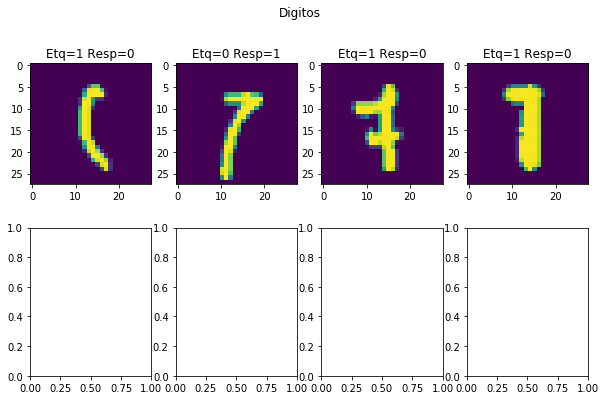

In [408]:
plotDigits(errorData3D, etqOriData, 2, 4, etqErrorData)

In [388]:
errorData3D.shape

(4, 28, 28)

# >:B